# EPA1361 - Model-Based Decision Making

## Multi-model analysis

This exercise uses a simple version of the [Lotka-Volterra predator-prey equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) to show how the EMA Workbench can be used for a
multi-model analysis, in addition to typical parametric/structural uncertainties. This will let you test the connectors provided in the Workbench for Excel, NetLogo, and Vensim / PySD; we'll also use the models for the sensitivity analysis exercise in week 3.

**Assignment**
Using the three model files provided and the Python function below, define model objects for each implementation (Excel, NetLogo, Vensim/PySD, and Python), and test them using a single ensemble. Use 50 experiments sampled from the parameters below (so that each experiment will be executed for the 4 models, for a total of 200), and retrieve outputs for the _TIME_, _predators_, and _prey_ variables.
   * Excel and Vensim are only supported on Windows
   * Vensim requires the DSS version of Vensim
   * Netlogo supoprt depends on [jpype](http://jpype.readthedocs.io/en/latest/install.html) and [pynetlogo](https://pynetlogo.readthedocs.io/en/latest/). Also, if you don't have NetLogo installed, please get [NetLogo 6.3.0](https://ccl.northwestern.edu/netlogo/download.shtml)
   * for pysd, see [its documentation](http://pysd.readthedocs.io/en/master/installation.html)
   * If possible try to work with all model versions, but even 2 or 3 (pure python and something else should be sufficient).


|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |
|Final time	    |365	    |
|dt	    |0.25	    |

* Note that your EMA Workbench installation includes [example scripts](https://github.com/quaquel/EMAworkbench/tree/master/ema_workbench/examples) for the different connectors. The different model objects follow a similar syntax but will need to be slightly adjusted depending on the software (e.g. to specify the NetLogo run length or the sheet name in Excel).
  * This [tutorial](https://emaworkbench.readthedocs.io/en/latest/basic_tutorial.html) also shows a simple model in Python, Vensim and Excel connected to the workbench.

* These model objects can be used with a replication functionality (for instance to test the effect of stochastic uncertainty in a NetLogo model), which repeats a given experiment over multiple replications. You can use a single replication in this exercise as the models are not stochastic. By default, each outcome array will then have a shape of (# experiments, # replications, # time steps). Try adapting the outcome arrays so that they can be used with the _lines_ plotting function of the Workbench, and plot the results grouped by model.

* To check the graphical results, find the maximum absolute error of the time series you obtained for the _prey_ variable in the Excel, NetLogo, and Vensim/PySD models, relative to the Python function.

In [1]:
# Some imports you may need
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging, ScalarOutcome)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel
from ema_workbench.connectors.pysd_connector import PysdModel

from ema_workbench.em_framework.samplers import LHSSampler
from ema_workbench.em_framework.salib_samplers import MorrisSampler, SobolSampler

from ema_workbench.analysis.plotting import lines, Density

C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\ema_workbench\em_framework\__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\ema_workbench\connectors\__init__.py:19: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)
C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)
C:\Users\muham\OneDrive - Delft University of Technology\Docume

In [2]:
# Import the Python function
from model.pred_prey import PredPrey

In [3]:
# Define uncertainties and outcomes
model_uncertainties = [
    RealParameter('prey_birth_rate', 0.015, 0.035),
    RealParameter('predation_rate', 0.0005, 0.003),
    RealParameter('predator_efficiency', 0.001, 0.004),
    RealParameter('predator_loss_rate', 0.04, 0.08)
]

model_outcomes = [
    TimeSeriesOutcome('TIME'),
    TimeSeriesOutcome('predators'),
    TimeSeriesOutcome('prey')
]

# Instantiate Python Model
python_model = Model('PredPreyPython', function=PredPrey)

python_model.uncertainties = model_uncertainties
python_model.outcomes = model_outcomes

# Instantiate NetLogo Model
netlogo_model = NetLogoModel(name='PredPreyNetLogo', wd=r'./model', model_file='PredPrey.nlogo')

netlogo_model.run_length = 365
netlogo_model.replications = 1

netlogo_model.uncertainties = model_uncertainties
netlogo_model.outcomes = [
    TimeSeriesOutcome('predators'),
    TimeSeriesOutcome('prey')
]

# Define model objects for the different implementations

In [4]:
# Run the Python Model
if __name__ == "__main__":
    from ema_workbench import MultiprocessingEvaluator, ema_logging

    n = 50
    ema_logging.log_to_stderr(ema_logging.INFO)
    with MultiprocessingEvaluator(python_model, n_processes=4) as evaluator:
        python_results = evaluator.perform_experiments(n)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:01<00:00, 41.48it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
# Run the Python Model
if __name__ == "__main__":
    from ema_workbench import MultiprocessingEvaluator, ema_logging

    ema_logging.log_to_stderr(ema_logging.INFO)
    n = 50
    with MultiprocessingEvaluator(netlogo_model, n_processes=-1, maxtasksperchild=4) as evaluator:
        netlogo_results = evaluator.perform_experiments(n)

[MainProcess/INFO] pool started with 15 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:13<00:00,  3.75it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


PermissionError: [WinError 5] Access is denied: 'C:\\Users\\muham\\OneDrive - Delft University of Technology\\Documents\\Kuliah\\S2\\Q1.4\\Model-based Decision Making\\Assignments\\week_01\\prof_material\\Week 1-2 - general intro to exploratory modelling\\tmpiVrzl\\tmp10392\\model\\__pycache__'

In [6]:
python_experiments, python_outcomes = python_results
netlogo_experiments, netlogo_outcomes = netlogo_results

In [7]:
python_experiments

,predation_rate,predator_efficiency,predator_loss_rate,prey_birth_rate,scenario,policy,model
0,0.001016,0.003105,0.067056,0.021185,0,None,PredPreyPython
1,0.002226,0.001681,0.054302,0.033959,1,None,PredPreyPython
2,0.002047,0.002970,0.054631,0.020062,2,None,PredPreyPython
3,0.000690,0.001042,0.072367,0.019522,3,None,PredPreyPython
4,0.002747,0.003640,0.061116,0.017719,4,None,PredPreyPython
5,0.001698,0.003691,0.077450,0.025816,5,None,PredPreyPython
6,0.001528,0.003555,0.078993,0.033087,6,None,PredPreyPython
7,0.001412,0.003060,0.044900,0.018217,7,None,PredPreyPython
8,0.000583,0.002622,0.076608,0.015008,8,None,PredPreyPython
9,0.002386,0.002136,0.070485,0.032859,9,None,PredPreyPython


In [8]:
netlogo_experiments

,predation_rate,predator_efficiency,predator_loss_rate,prey_birth_rate,scenario,policy,model
0,0.001973,0.001765,0.044629,0.019891,50,None,PredPreyNetLogo
1,0.000756,0.003543,0.045699,0.023179,51,None,PredPreyNetLogo
2,0.000876,0.002806,0.050396,0.030620,52,None,PredPreyNetLogo
3,0.002493,0.003895,0.056946,0.028175,53,None,PredPreyNetLogo
4,0.002155,0.001265,0.058411,0.027097,54,None,PredPreyNetLogo
5,0.000973,0.002005,0.078260,0.021778,55,None,PredPreyNetLogo
6,0.002008,0.001236,0.073025,0.031748,56,None,PredPreyNetLogo
7,0.000913,0.003677,0.069935,0.033672,57,None,PredPreyNetLogo
8,0.002794,0.001149,0.066851,0.025515,58,None,PredPreyNetLogo
9,0.001519,0.001611,0.042287,0.032288,59,None,PredPreyNetLogo


In [9]:
def plot_time_series_outcome(outcomes, variable_name, timestep):
    data = np.array(outcomes[variable_name])  # shape: (n_runs, n_timesteps)

    # Flatten outcome stats to ensure 1D
    median = np.median(data, axis=0).flatten()
    min_vals = np.min(data, axis=0).flatten()
    max_vals = np.max(data, axis=0).flatten()

    # Construct time axis
    time = np.arange(0, len(median) * timestep, timestep)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(time, median, label=f'Median {variable_name}', linewidth=2)
    plt.fill_between(time, min_vals, max_vals, alpha=0.3, label='Min-Max range')
    plt.xlabel('Time')
    plt.ylabel(variable_name)
    plt.title(f'{variable_name} over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

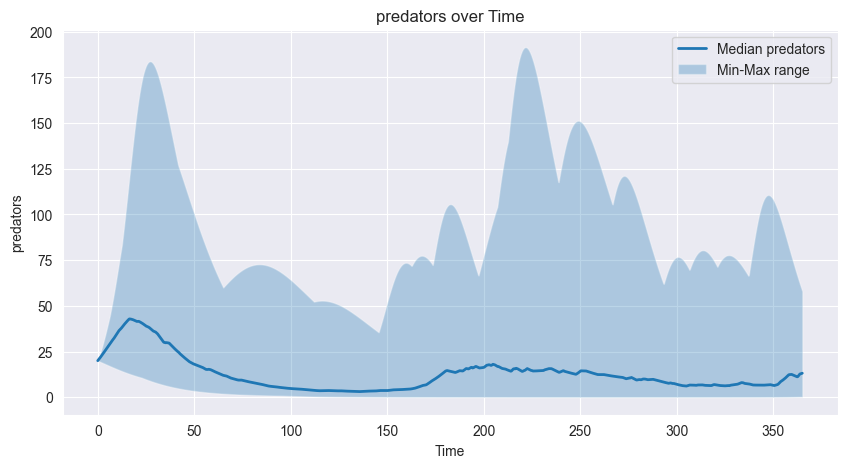

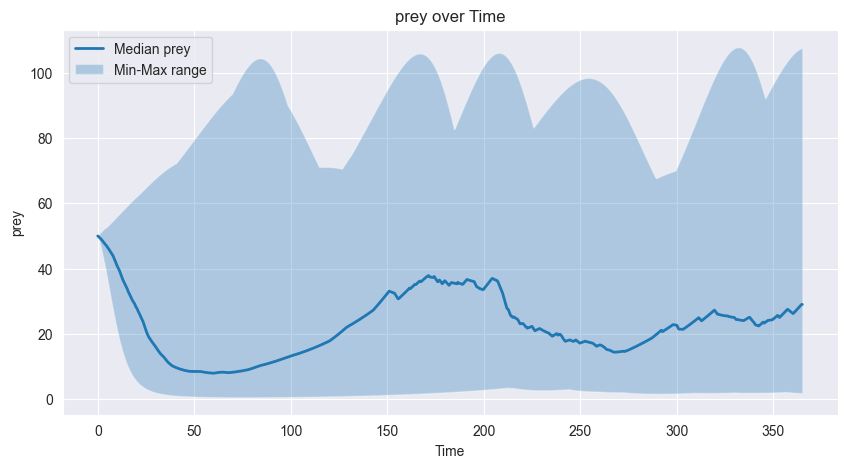

In [10]:
plot_time_series_outcome(python_outcomes, 'predators', 0.25)
plot_time_series_outcome(python_outcomes, 'prey', 0.25)

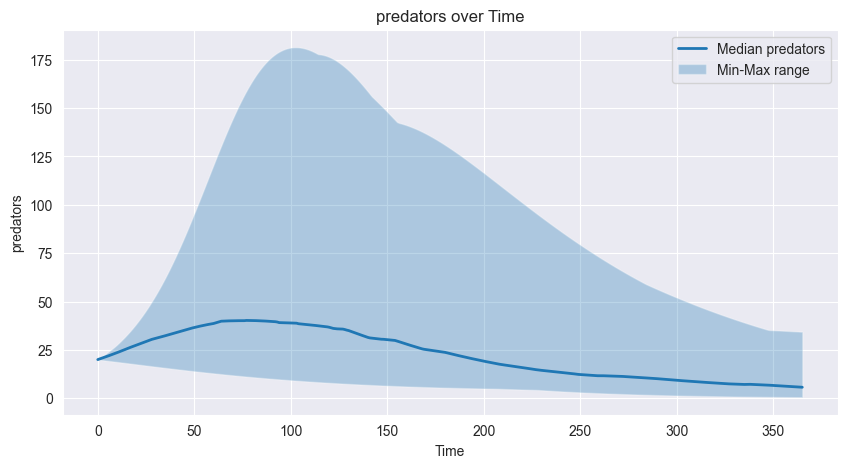

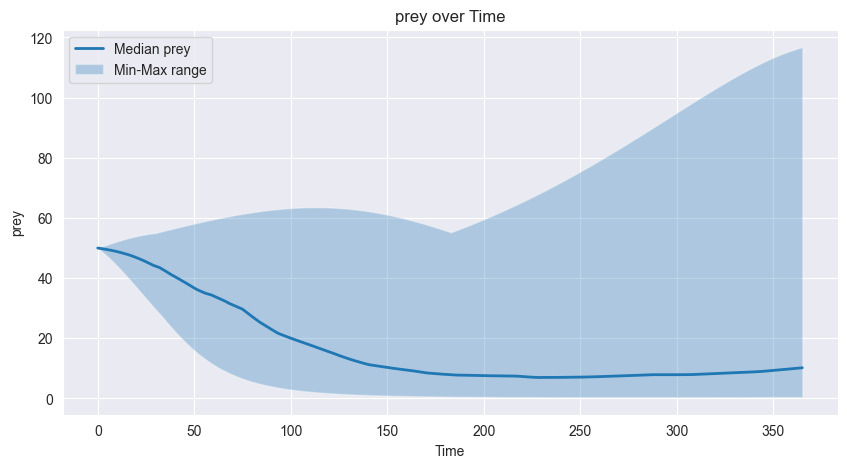

In [11]:
plot_time_series_outcome(netlogo_outcomes, 'predators', 1)
plot_time_series_outcome(netlogo_outcomes, 'prey', 1)